In [35]:
import sys
print(sys.version)

3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import time
import numpy as np
import scipy
import scipy.optimize
import pandas as pd
import lmfit

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams.update({'font.size': 18})

In [38]:
%load_ext autoreload
%autoreload 2

from ZernikePFS import ZernikeFitterPFS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# simplest example with default parameters, one parameter changed
zmax = 22
single_image_analysis = ZernikeFitterPFS(zmaxInit = zmax,verbosity=1)
single_image_analysis.initParams()
single_image_analysis.params['detFrac'] = lmfit.Parameter(name='detFrac', value=0.70)
resulting_image, psf_pos = single_image_analysis.constructModelImage_PFS_naturalResolution()

np.__version__1.16.2
scipy.__version__1.5.2
 
Initializing ZernikeFitterPFS
Verbosity parameter is: 1
Highest Zernike polynomial is (zmax): 22
 
Entering constructModelImage_PFS_naturalResolution
(20, 20)
 
Entering _getOptPsf_naturalResolution
['detFrac', 'strutFrac', 'dxFocal', 'dyFocal', 'slitFrac', 'slitFrac_dy']
['x_fiber', 'y_fiber', 'effective_ilum_radius', 'frd_sigma', 'frd_lorentz_factor', 'det_vert', 'slitHolder_frac_dx']
['wide_0', 'wide_23', 'wide_43', 'misalign']
set of pupil_parameters I. : [0.7, 0.07, 0.0, 0.0, 0.05, 0]
set of pupil_parameters II. : [1, 0, 0.9, 0, 0.5, 1, 0]
set of pupil_parameters III. : [0, 0, 0, 0]
 
Entering _get_Pupil (function inside ZernikeFitterPFS)
Size of the pupil (npix): 1536
Entering PFSPupilFactory class
Entering PupilFactory class
Entering getPupil (function inside PFSPupilFactory)
Time to execute illumination considerations due to misalignment 0.04877877235412598
f_multiplier_factor for size of detector triangle is: 1.0
Time for cutting o

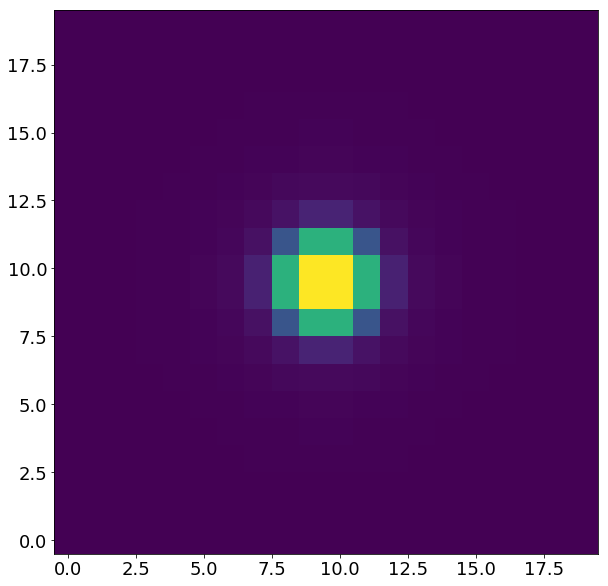

In [40]:
plt.imshow(resulting_image, origin = 'lower')

In [43]:
# more complex example that is using more realistic model parameters
# and real science data

with open('./Example_data/example_params_dict.json', 'r') as read_file:
    example_params_dict = json.loads(read_file.read())
example_sci_image = np.load('./Example_data/example_sci_image.npy')
example_var_image = np.load('./Example_data/example_var_image.npy')

single_image_analysis_example_2 = ZernikeFitterPFS(image = example_sci_image,
                                                   image_var = example_var_image, zmaxInit = zmax,verbosity=1)

single_image_analysis_example_2.initParams()
for i in range(len(example_params_dict)):
    single_image_analysis_example_2.params[list(example_params_dict.keys())[i]] =\
    lmfit.Parameter(name=list(example_params_dict.keys())[i], value=list(example_params_dict.values())[i])
    
resulting_image_2, psf_pos_2 = single_image_analysis_example_2.constructModelImage_PFS_naturalResolution()

np.__version__1.16.2
scipy.__version__1.5.2
 
Initializing ZernikeFitterPFS
Verbosity parameter is: 1
Highest Zernike polynomial is (zmax): 22
 
Entering constructModelImage_PFS_naturalResolution
(60, 60)
 
Entering _getOptPsf_naturalResolution
['detFrac', 'strutFrac', 'dxFocal', 'dyFocal', 'slitFrac', 'slitFrac_dy']
['x_fiber', 'y_fiber', 'effective_ilum_radius', 'frd_sigma', 'frd_lorentz_factor', 'det_vert', 'slitHolder_frac_dx']
['wide_0', 'wide_23', 'wide_43', 'misalign']
set of pupil_parameters I. : [0.65, 0.07, -0.033662416370898306, 0.04002791351759554, 0.060412613586566646, 0.005935320115564806]
set of pupil_parameters II. : [0.018190628128788043, -0.06378627590726278, 0.9234510923763041, 0.17409216092654492, 0.8506515230499756, 1.0243891633501097, 0.17409216092654492]
set of pupil_parameters III. : [0.1430627407644312, 0.16895750392312944, 0.26369814349088366, 0.7198553584143798]
 
Entering _get_Pupil (function inside ZernikeFitterPFS)
Size of the pupil (npix): 1536
Entering P

chi2 within shgo with use_only_chi False and use_center_of_light False [4.27096536 9.37476388] / 1261.4861756216037
chi2 within shgo with use_only_chi False and use_center_of_light False [4.46808684 8.58412115] / 1261.8709295027352
chi2 within shgo with use_only_chi False and use_center_of_light False [4.2052582 9.035917 ] / 1260.501638421468
chi2 within shgo with use_only_chi False and use_center_of_light False [4.33667252 9.71361077] / 1265.6259600045364
chi2 within shgo with use_only_chi False and use_center_of_light False [4.43523326 8.86649355] / 1259.861340643522
chi2 within shgo with use_only_chi False and use_center_of_light False [4.82947621 9.09239148] / 1261.482133907307
chi2 within shgo with use_only_chi False and use_center_of_light False [4.3613127  9.05003562] / 1259.7292173634082
chi2 within shgo with use_only_chi False and use_center_of_light False [4.19704481 8.65471425] / 1262.1411135049634
chi2 within shgo with use_only_chi False and use_center_of_light False [4.498

chi2 within shgo with use_only_chi False and use_center_of_light False [4.46363598 9.03095003] / 1259.5737882338753
chi2 within shgo with use_only_chi False and use_center_of_light False [4.46362632 9.03096494] / 1259.5737882320889
chi2 within shgo with use_only_chi False and use_center_of_light False [4.46362809 9.03097939] / 1259.5737882346104
chi2 within shgo with use_only_chi False and use_center_of_light False [4.46362851 9.03095941] / 1259.5737882319647
We are fitting for only one source
One source fitting result is [4.46362851 9.03095941]
offset_final_and_sci: [ 0.0743884  -0.10616164]
Time for single_Psf_position protocol is 1.759394645690918
Sucesfully created optPsf_final
Finished with optPsf_postprocessing
 


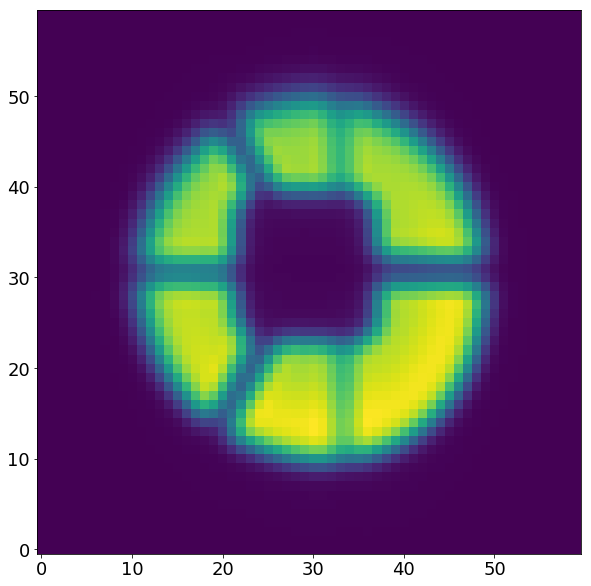

In [44]:
plt.imshow(resulting_image_2, origin = 'lower')